<a href="https://colab.research.google.com/github/natrivera/Profile/blob/master/Decision_Tree_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import plot_tree
import graphviz 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# create random data with uniform distribution for simulation
distance = pd.DataFrame(np.random.uniform(0, 50, size=10000))

signal = pd.DataFrame(np.random.uniform(1,30000,size=10000))

impedence = pd.DataFrame(np.random.uniform(1,50000,size=10000))

In [4]:
# combine the data to a dataframe
df = pd.concat([distance,signal,impedence], axis=1)
df.set_axis(['distance', 'signal', 'impedence'], axis=1, inplace=True)
round(df.describe(),2)

,distance,signal,impedence
count,10000.00,10000.00,10000.00
mean,24.89,15099.29,25003.99
std,14.35,8635.70,14554.55
min,0.01,4.49,8.40
25%,12.45,7684.53,12364.08
50%,24.81,15141.71,25091.95
75%,37.07,22629.37,37859.02
max,50.00,29995.51,49997.87


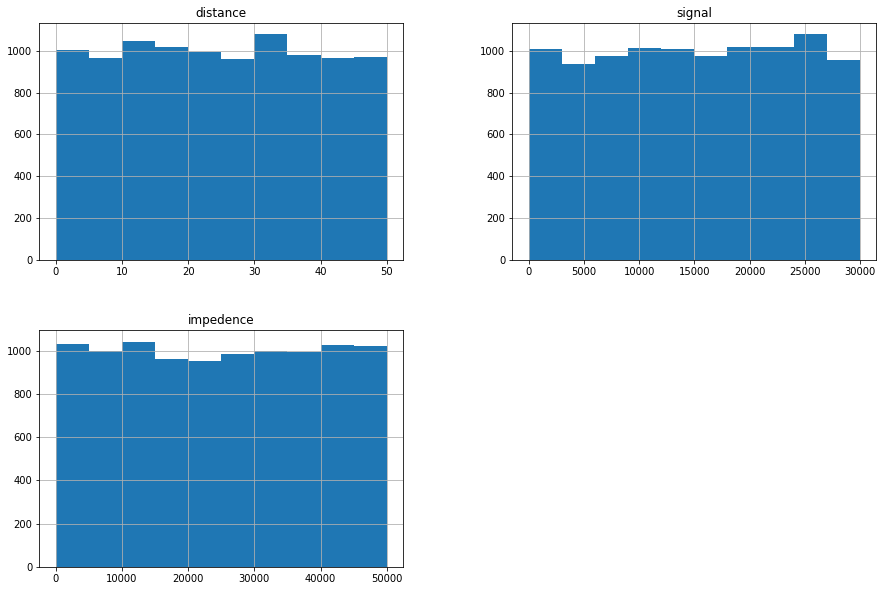

In [5]:
# show a histogram of each variable to see uniform distribution
a = df.hist(figsize=(15, 10))

In [6]:
# create failure data as a random variable with 15% probability of occuring
df['failure'] = pd.DataFrame(np.random.choice(a=[0,1],size=10000,p=[0.85, 0.15]))

round(df.describe(),2)

,distance,signal,impedence,failure
count,10000.00,10000.00,10000.00,10000.00
mean,24.89,15099.29,25003.99,0.15
std,14.35,8635.70,14554.55,0.35
min,0.01,4.49,8.40,0.00
25%,12.45,7684.53,12364.08,0.00
50%,24.81,15141.71,25091.95,0.00
75%,37.07,22629.37,37859.02,0.00
max,50.00,29995.51,49997.87,1.00


Text(0.5, 1.0, 'Distance vs Impedence - Color = Failure')

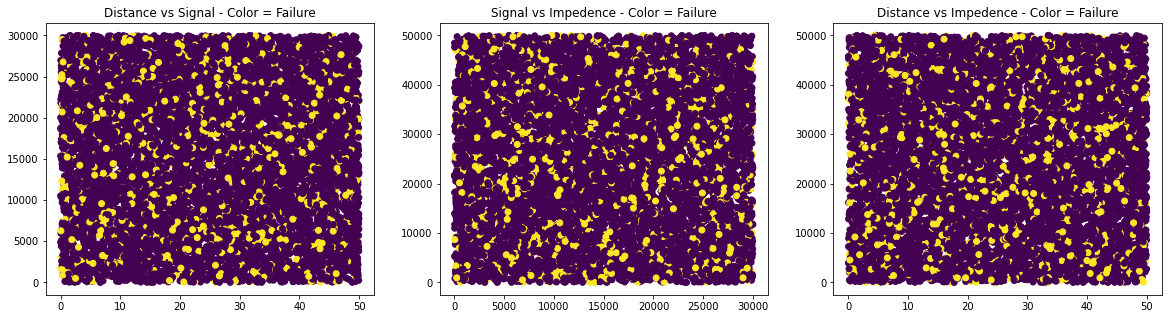

In [7]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].scatter(df.distance,df.signal , c=df.failure)
axs[0].set_title("Distance vs Signal - Color = Failure")
axs[1].scatter(df.signal,df.impedence , c=df.failure)
axs[1].set_title("Signal vs Impedence - Color = Failure")
axs[2].scatter(df.distance,df.impedence , c=df.failure)
axs[2].set_title("Distance vs Impedence - Color = Failure")

In [ ]:
Notice how the failures are completely at random.

In [8]:
# split the data into response and predictors
y = df.failure.values
X = df.drop(['failure'] , axis=1).values

#create a 70/30 split for train and test data
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size =
0.3 , stratify=y)

In [9]:
print('X training features shape: ' , X_train.shape)
print('X testing features shape: ' , X_test.shape)
print('y training responses shape: ' , y_train.shape)
print('y testing responses shape: ' , y_test.shape)
print('Percentage of failures FUll Data: ' , round(float(y.mean()),2))
print('Percentage of failures Train Data: ' , round(float(y_train.mean()),2))
print('Percentage of failures Test Data: ' , round(float(y_test.mean()),2))

X training features shape:  (7000, 3)
X testing features shape:  (3000, 3)
y training responses shape:  (7000,)
y testing responses shape:  (3000,)
Percentage of failures FUll Data:  0.15
Percentage of failures Train Data:  0.15
Percentage of failures Test Data:  0.15


In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# test the model
clf.score(X_test, y_test)

0.7423333333333333

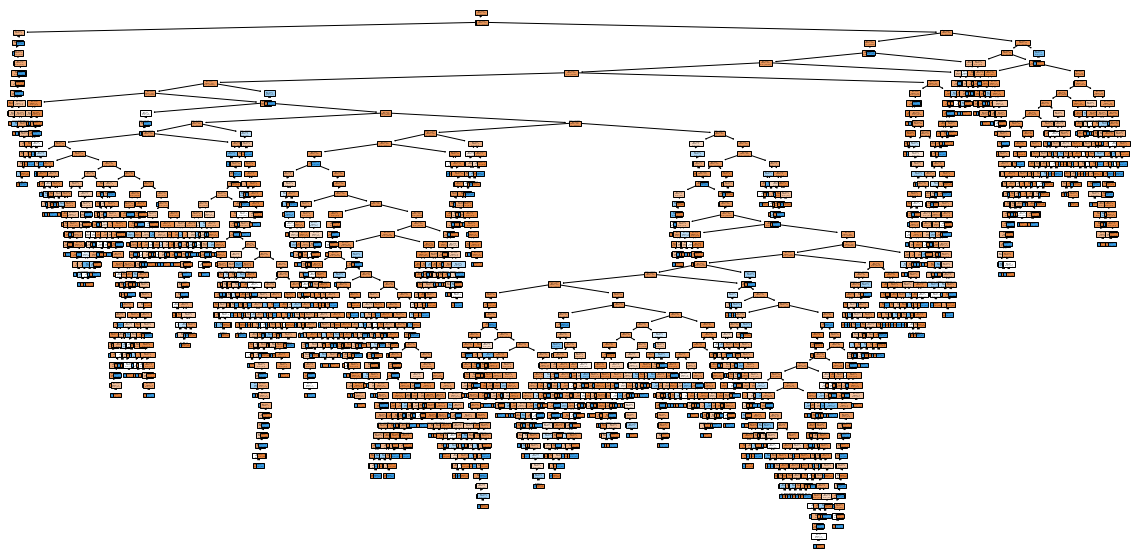

In [11]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, feature_names=df.columns.values.tolist(), filled=True)

In [12]:
clf.score(X_train,y_train)

1.0

The decision tree above is overfit. <br>A null model (one where all predictions are 'no failure') would perform at 85% since we know that only 15% of the data has failures. <br>This model performed at 74% on the test data and 100% on the training data. <br>Since the failures are completely at random, this was expected.

In [13]:
# create response variable with a pattern (not random)
# empty list to add failure data
arr = list()
for index, row in df.iterrows():

  # loop through df
  if (row.signal > 20000 and row.distance > 15) or (row.signal < 5000 and row.distance < 5) :
    num = np.random.choice(a=[0,1],size=1,p=[0.01, 0.99])
  else:
    num = np.random.choice(a=[0,1],size=1,p=[0.99, 0.01])

  arr.append(num)

# add failure column to df
df['failure'] = arr

Text(0.5, 1.0, 'Distance vs Impedence - Color = Failure')

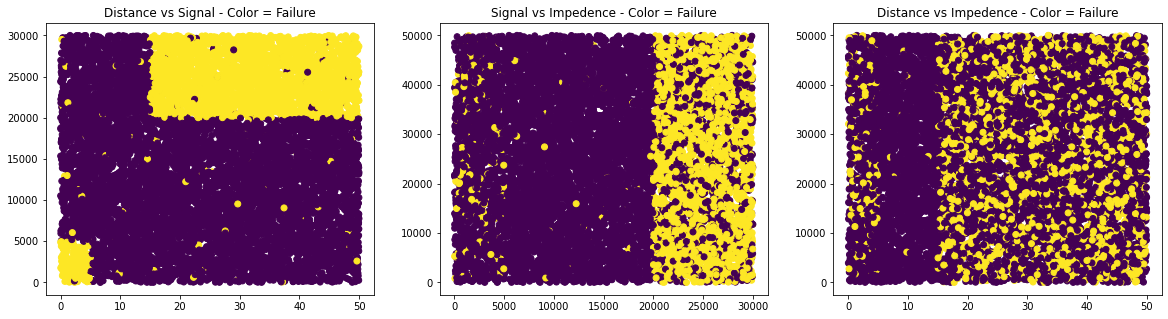

In [14]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].scatter(df.distance,df.signal , c=df.failure)
axs[0].set_title("Distance vs Signal - Color = Failure")
axs[1].scatter(df.signal,df.impedence , c=df.failure)
axs[1].set_title("Signal vs Impedence - Color = Failure")
axs[2].scatter(df.distance,df.impedence , c=df.failure)
axs[2].set_title("Distance vs Impedence - Color = Failure")

Now it is obvious that the failures are not at random.

In [15]:
# split the data into response and predictors
y = df.failure.astype('int')
#y=y.astype('int')
X = df.drop('failure' , axis=1).values

#create a 70/30 split for train and test data
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size =
0.3 , stratify=y)

In [17]:
print('X training features shape: ' , X_train.shape)
print('X testing features shape: ' , X_test.shape)
print('y training responses shape: ' , y_train.shape)
print('y testing responses shape: ' , y_test.shape)
print('Percentage of failures FUll Data: ' , round(float(y.mean()),2))
print('Percentage of failures Train Data: ' , round(float(y_train.mean()),2))
print('Percentage of failures Test Data: ' , round(float(y_test.mean()),2))

X training features shape:  (7000, 3)
X testing features shape:  (3000, 3)
y training responses shape:  (7000,)
y testing responses shape:  (3000,)
Percentage of failures FUll Data:  0.26
Percentage of failures Train Data:  0.26
Percentage of failures Test Data:  0.26


In [19]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#predictions = clf.predict(X_test)

# test the model
clf.score(X_test, y_test)

0.9816666666666667

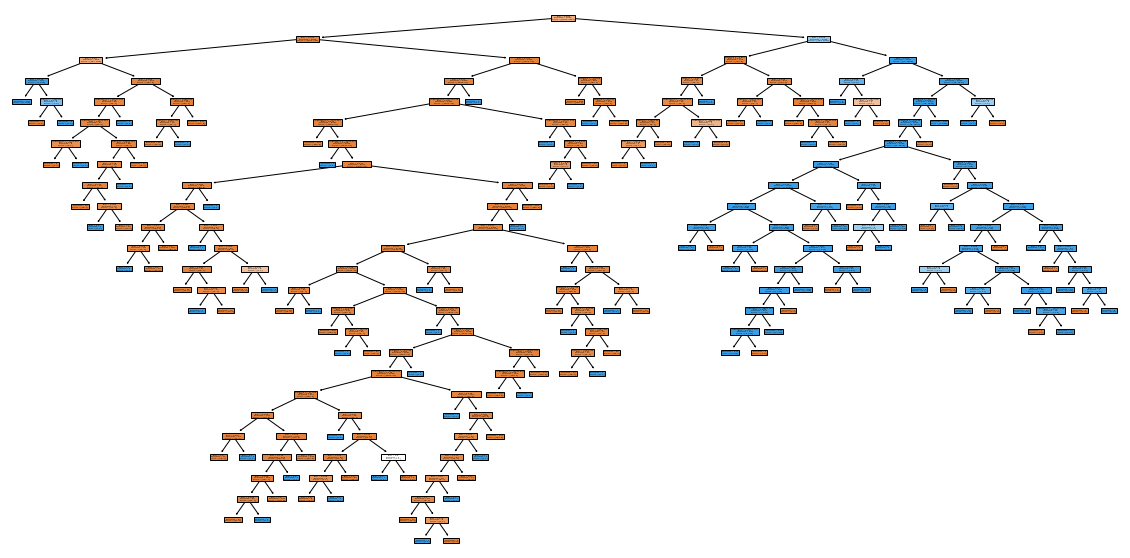

In [20]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, feature_names=df.columns.values.tolist(), filled=True)

This model performs well on both the training and test data but it is difficult to interpret. <br>Interpretability is one if the strenghs of a decision tree model. <br>Time to prune the tree back and get it to a point where it has a high score and the results can be explained easily. 

Note: This model is overfit. Need to prune tree.

In [21]:
# calculate the score of decision tress pruned to different levels for all values from 1 - 20
for x in range(1,21):
  clf = tree.DecisionTreeClassifier(max_depth=x)
  clf = clf.fit(X_train, y_train)
  #predictions = clf.predict(X_test)

  # test the model
  score = clf.score(X_test, y_test)
  print( x , ' - ' , round(score,4) )

1  -  0.8683
2  -  0.9717
3  -  0.991
4  -  0.99
5  -  0.99
6  -  0.9897
7  -  0.989
8  -  0.9887
9  -  0.9883
10  -  0.9873
11  -  0.9867
12  -  0.986
13  -  0.9857
14  -  0.9847
15  -  0.9847
16  -  0.984
17  -  0.984
18  -  0.9833
19  -  0.984
20  -  0.983


Notice that the score peaks at 2 and then begins to drop. This is expected since we coded the failure variable to depend on two variables.

In [22]:
# creating the decision tree model with a max depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
#predictions = clf.predict(X_test)

# test the model
clf.score(X_test, y_test)

0.991

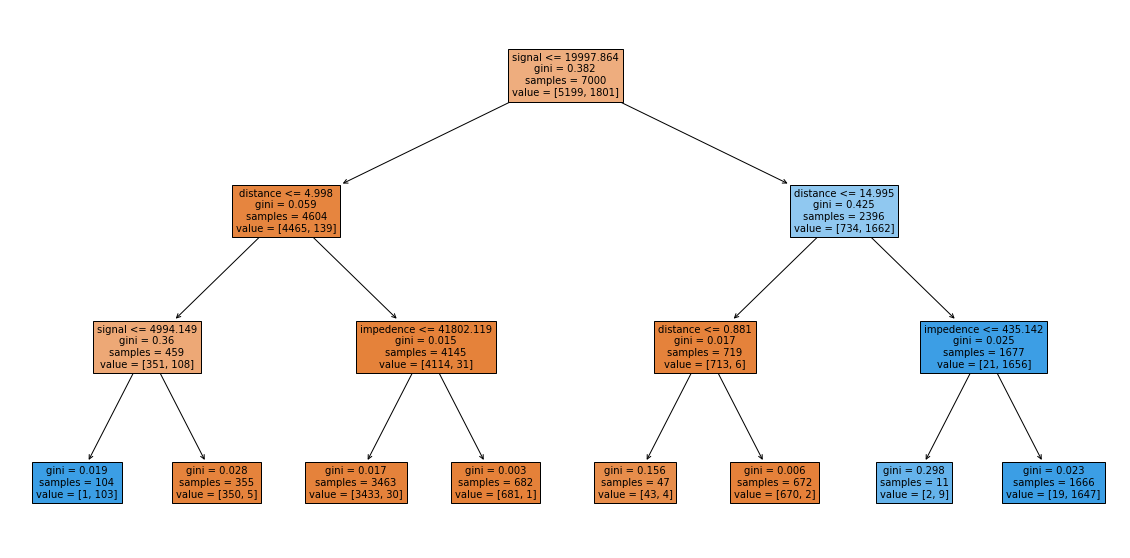

In [23]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf, feature_names=df.columns.values.tolist(), filled=True)

Text(0.5, 1.0, 'Distance vs Impedence - Color = Failure')

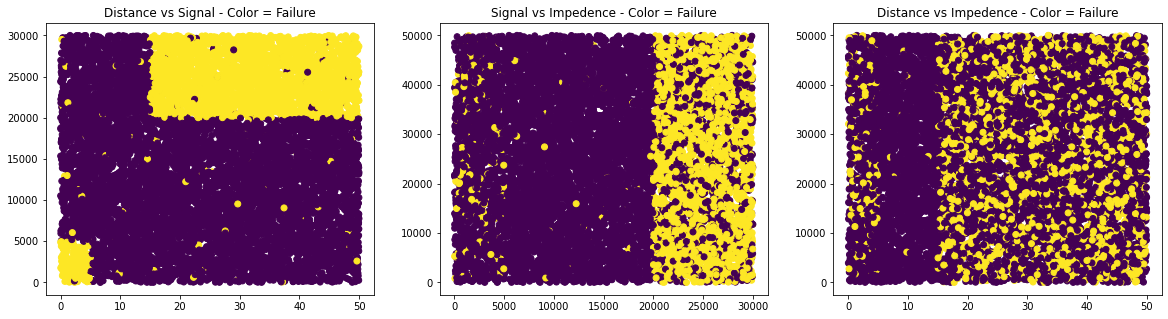

In [24]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
axs[0].scatter(df.distance,df.signal , c=df.failure)
axs[0].set_title("Distance vs Signal - Color = Failure")
axs[1].scatter(df.signal,df.impedence , c=df.failure)
axs[1].set_title("Signal vs Impedence - Color = Failure")
axs[2].scatter(df.distance,df.impedence , c=df.failure)
axs[2].set_title("Distance vs Impedence - Color = Failure")